### Metadata

*   Name: Name of the Phone
*   Brand: Brand Name
*    Model: Model of the Phone
* Battery capacity (mAh): Battery capacity in mAh
* Screen size (inches): Screen Size in Inches across opposite corners
* Touchscreen: Whether the phone is touchscreen supported or not
* Resolution x: The resolution of the phone along the width of the screen
* Resolution y: The resolution of the phone along the height of the screen
* Processor: No. of processor cores
* RAM (MB): RAM available in phone in MB
* Internal storage: Internal Storage of phone in GB
* Rear camera: Resolution of rear camera in MP (0 if unavailable)
* Front camera: Resolution of front camera in MP (0 if unavailable)
* Operation system: OS used in phone
* Wi-Fi: Whether phone has WiFi functionality
* Bluetooth: Whether phone has Bluetooth functionality
* GPS: Whether phone has GPS functionality
* Number of SIMs: Number of SIM card slots in phone
* 3G: Whether phone has 3G network functionality
* 4G/LTE: Whether phone has 4G/LTE network functionality
* Price: Price of the phone in INR



### Data Cleaning and Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
# Download Link of dataset - https://www.kaggle.com/datasets/pratikgarai/mobile-phone-specifications-and-prices or from the github repository and upload it to the files section of colab
df = pd.read_csv("/content/ndtv_data_final.csv")
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [ ]:
df.shape

(1359, 22)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

In [ ]:
#List of categorical columns (with different values) - [Brand, Model, Operating System]
#List of categorical columns (with boolean values ) - [Touchscreen, Wi-Fi, Bluetooth, GPS, 3G, 4G/ LTE]
#List of numerical columns -[Battery cap, Screen Size, Resolution x, Resolution y, Processor, RAM, Internal storage, Rear Camera, Front Camera, Number of Sims, Price]

In [ ]:
df.isna().sum()

Unnamed: 0                0
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64

In [ ]:
# Removing unnecessary columns
df.drop(columns=['Unnamed: 0', 'Name'], inplace = True)

In [ ]:
#Converting RAM from MB to GB (Assuming here that 1GB = 1000MB)
df['RAM (MB)'] = df['RAM (MB)']/1000

In [ ]:
df.rename(columns={'RAM (MB)': 'RAM (GB)'}, inplace = True)

In [ ]:
df.head()

,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (GB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12.0,256.0,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6.0,64.0,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4.0,64.0,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4.0,64.0,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6.0,128.0,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


## EDA

####Numerical Features

In [ ]:
df.describe()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (GB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2938.489330,5.291310,811.543046,1490.777778,5.551141,2.488778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,873.514133,0.671357,270.707271,557.780120,2.196562,1.664440,36.950241,8.948337,6.295448,0.374457,13857.497077
min,1010.000000,2.400000,240.000000,320.000000,1.000000,0.064000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,2300.000000,5.000000,720.000000,1280.000000,4.000000,1.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,3000.000000,5.200000,720.000000,1280.000000,4.000000,2.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


**Univariate Analysis:**
Univariate analysis focuses on exploring individual variables independently. For numerical variables like RAM, internal memory, and battery capacity, descriptive statistics such as mean, median, standard deviation, and quartiles are calculated. Density plots are created to visualize the distributions of these variables. Box plot is also used to show the distribution of camera resolution for front and rear camera. For categorical variables like Brand and operating system, bar plots are used to show the frequency distribution of different categories. Other categorical columns which had boolean values were converted to numerical values 1- YES ans 0 - NO then bar plots were used to show the count of these features.

**Bivariate Analysis:**
Bivariate analysis examines the relationships between two variables. In the context of mobile price prediction, bivariate analysis involves exploring the relationship between each independent variable and the target variable (price). Scatter plots are created to visualize the relationship between numerical variables and price. For example, a scatter plot of RAM versus price can help identify any linear or non-linear patterns. Bar plot are used to show variation in price with respect to the categorical features as shown below


In [ ]:
#Univariate Analysis
def num_distplot(df, x=None, width=7, height=4):
    plt.figure(figsize=(width,height))
    sns.distplot(df[x], rug=True, hist=True)
    plt.title(x)
    plt.show()

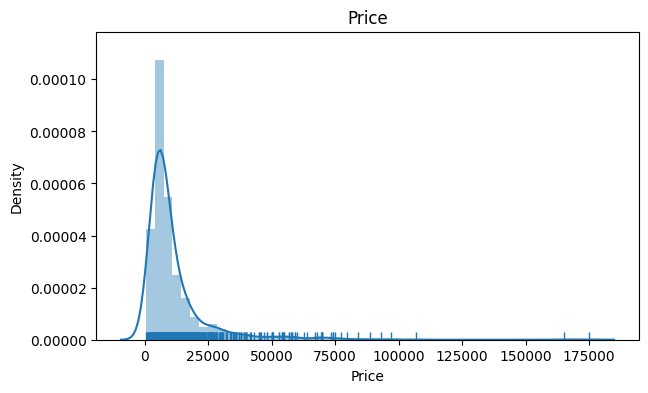

In [ ]:
num_distplot(df, 'Price')

We can see here for the price distribution that majority of the smartphone lie in range of 0 - 25,000 which are mostly low to budget smartphones with very few smartphone in the range of more than 80,000

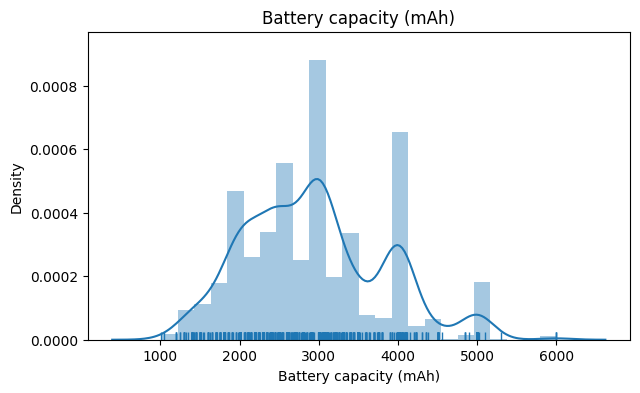

In [ ]:
num_distplot(df, 'Battery capacity (mAh)')

There are clear gradations between 2000, 3000, 4000 and 5000 mAh. This could be explained by the fact that companies want to outbid each other and a larger number of thousands is more meaningful.

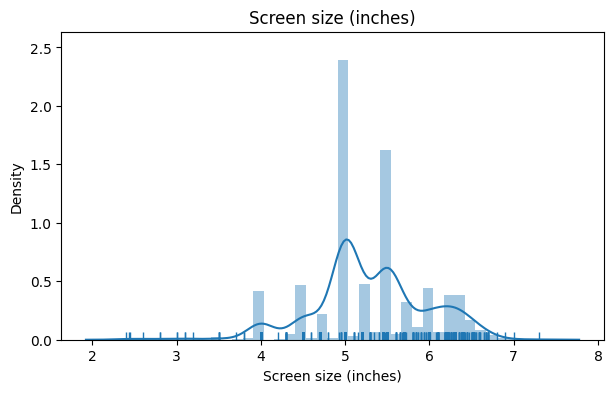

In [ ]:
num_distplot(df, 'Screen size (inches)')

Most phones have screen size of around 5-6 inches.

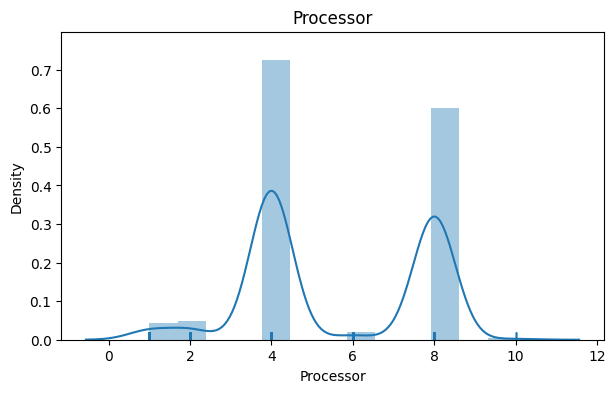

In [ ]:
num_distplot(df, 'Processor')

Most phone have 4 or 8 core processor

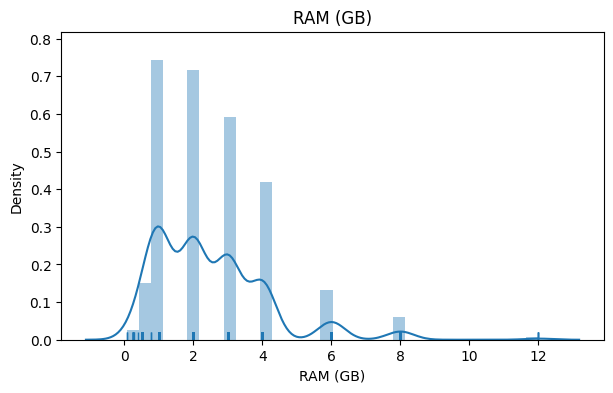

In [ ]:
num_distplot(df, 'RAM (GB)')

Ram size are evenly distributed at 2, 4, 6 GB. Most of the phones today have RAM size more than 4 GB. Highest RAM in the dataset is 12 GB

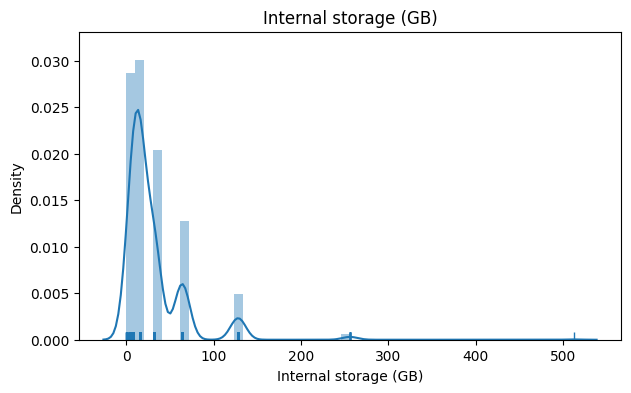

In [ ]:
num_distplot(df, 'Internal storage (GB)')

Majority of the phone have internal storage of 64GB very less phone have storage of 512 GB

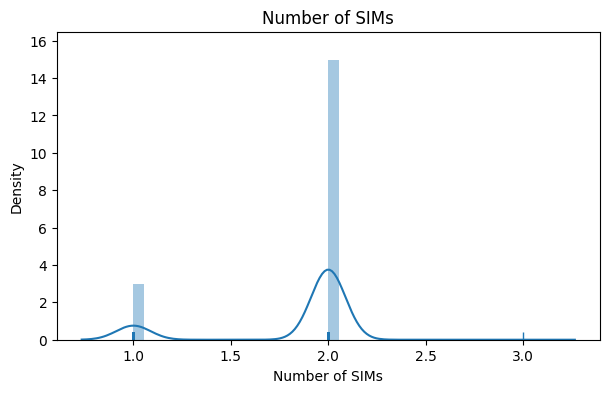

In [ ]:
num_distplot(df, 'Number of SIMs')

Majority of phone are dual sim

In [ ]:
#  Creating a PPI column which would remove Resolution in x and y and Screen Size
# So instead of Resolution x and y column and screen size column we can combine these three column to create a ppi column which is pixel pre inch which is more useful than these 3 column individually
df['ppi'] = (((df['Resolution x']**2) + (df['Resolution y']**2))**0.5/df['Screen size (inches)'])

In [ ]:
df.head()

,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (GB),Internal storage (GB),...,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,ppi
0,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12.0,256.0,...,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998,515.183966
1,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6.0,64.0,...,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999,404.893148
2,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4.0,64.0,...,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900,455.548515
3,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4.0,64.0,...,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900,323.613699
4,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6.0,128.0,...,32.0,Android,Yes,Yes,Yes,1,No,No,49990,402.688717


In [ ]:
# We can drop those columns
df.drop(columns = ['Screen size (inches)', 'Resolution x', 'Resolution y'], inplace = True)

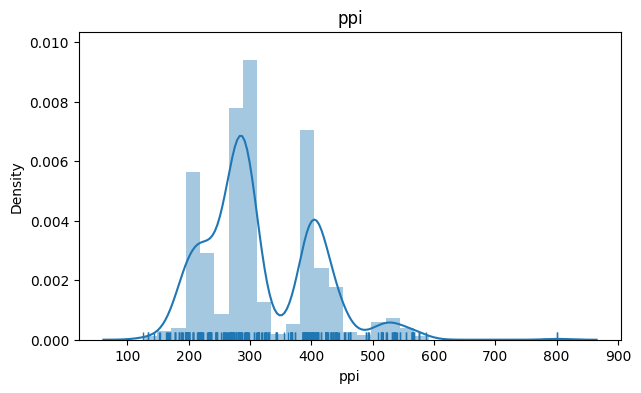

In [ ]:
num_distplot(df, 'ppi')

Majority of mobile have ppi in the range of 280 - 400.

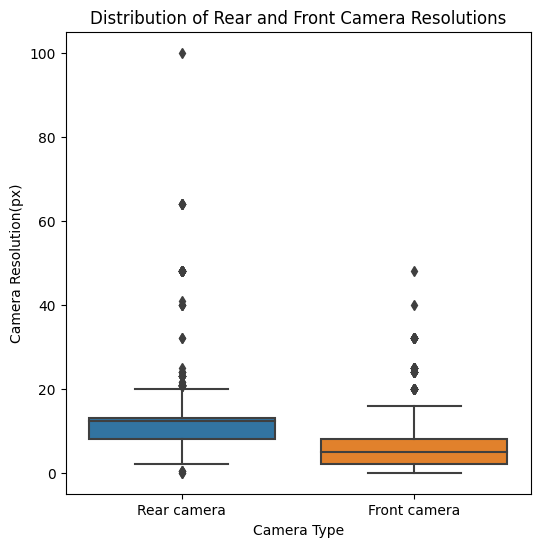

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[['Rear camera', 'Front camera']].clip(upper=100))
plt.xlabel('Camera Type')
plt.ylabel('Camera Resolution(px)')
plt.title('Distribution of Rear and Front Camera Resolutions')
plt.show()

Most front cameras have 5 MP and rear cameras have 12 MP on average.

In [ ]:
# Bivariate analysis
def multiple_Scatterplot(df, target_feature, test_feature, title):
    sns.set_style("darkgrid")
    sns.set_palette("Set2")
    sns.jointplot(data=df, x=target_feature, y=test_feature, kind='scatter', marginal_ticks=True, height=5)
    plt.suptitle(title)
    plt.show()

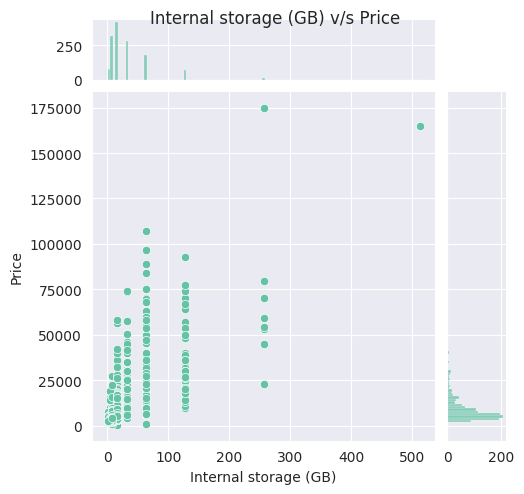

In [ ]:
multiple_Scatterplot(df, target_feature='Internal storage (GB)', test_feature='Price', title='Internal storage (GB) v/s Price')

We can see here that internal storage affects the price of the smartphone. Majority of the phone of have internal storage of 64 GB but their price differ because of other features of the phone

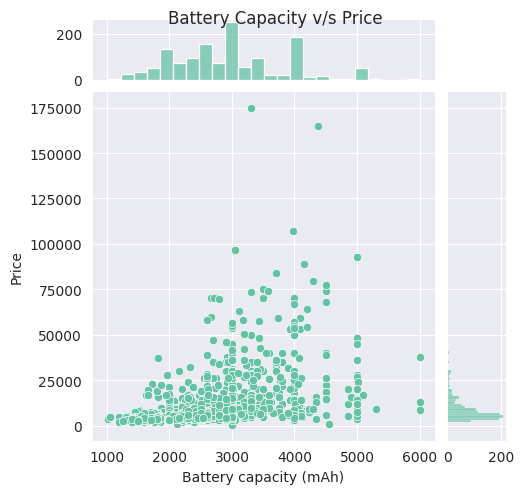

In [ ]:
multiple_Scatterplot(df, target_feature='Battery capacity (mAh)', test_feature='Price', title='Battery Capacity v/s Price')

Distribution of battery capacity with respect to Price. We can see majority of mobile have battery cap of around 2000 to 3000 and have price below 50,000

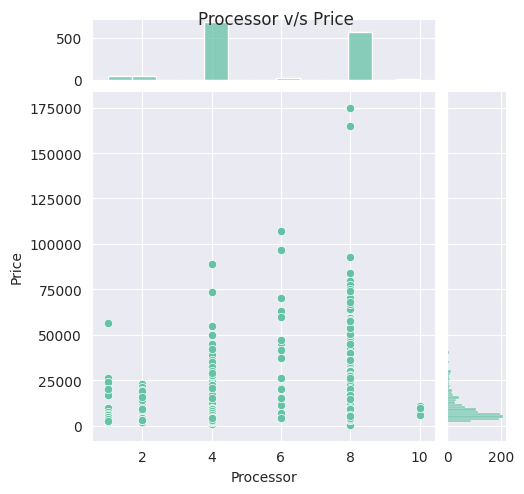

In [ ]:
multiple_Scatterplot(df, target_feature='Processor', test_feature='Price', title='Processor v/s Price')

As the number of processor increases the price also increases

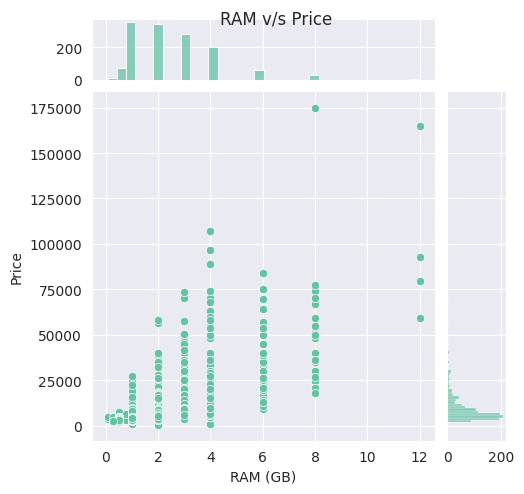

In [ ]:
multiple_Scatterplot(df, target_feature='RAM (GB)', test_feature='Price', title='RAM v/s Price')

Same goes for RAM. The price range greatly increases as the RAM size increases

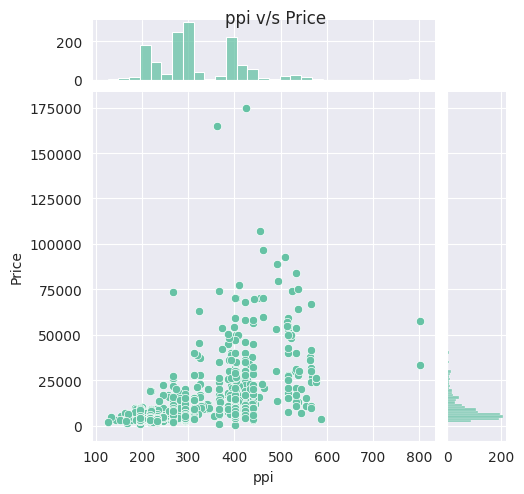

In [ ]:
multiple_Scatterplot(df, target_feature='ppi', test_feature='Price', title='ppi v/s Price')

We can see that some phones have lower ppi but still very high price mostly because of other features like brand value and operating system

In [ ]:
df.corr()['Price']

Battery capacity (mAh)    0.297525
Processor                 0.302492
RAM (GB)                  0.613446
Internal storage (GB)     0.644079
Rear camera               0.379120
Front camera              0.310672
Number of SIMs           -0.162491
Price                     1.000000
ppi                       0.525873
Name: Price, dtype: float64

####Categorical Features

In [ ]:
#Converting the Yes and No(Boolean) feature column with 1 and 0
def convert_yes_no(df, columns):
    for column in columns:
        df[column] = df[column].map({"Yes": 1, "No": 0})
    return df

col_list = ['Touchscreen', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE']
convert_yes_no(df, col_list)
df.head()

,Brand,Model,Battery capacity (mAh),Touchscreen,Processor,RAM (GB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,ppi
0,OnePlus,7T Pro McLaren Edition,4085,1,8,12.0,256.0,48.0,16.0,Android,1,1,1,2,1,1,58998,515.183966
1,Realme,X2 Pro,4000,1,8,6.0,64.0,64.0,16.0,Android,1,1,1,2,1,1,27999,404.893148
2,Apple,iPhone 11 Pro Max,3969,1,6,4.0,64.0,12.0,12.0,iOS,1,1,1,2,1,1,106900,455.548515
3,Apple,iPhone 11,3110,1,6,4.0,64.0,12.0,12.0,iOS,1,1,1,2,1,1,62900,323.613699
4,LG,G8X ThinQ,4000,1,8,6.0,128.0,12.0,32.0,Android,1,1,1,1,0,0,49990,402.688717


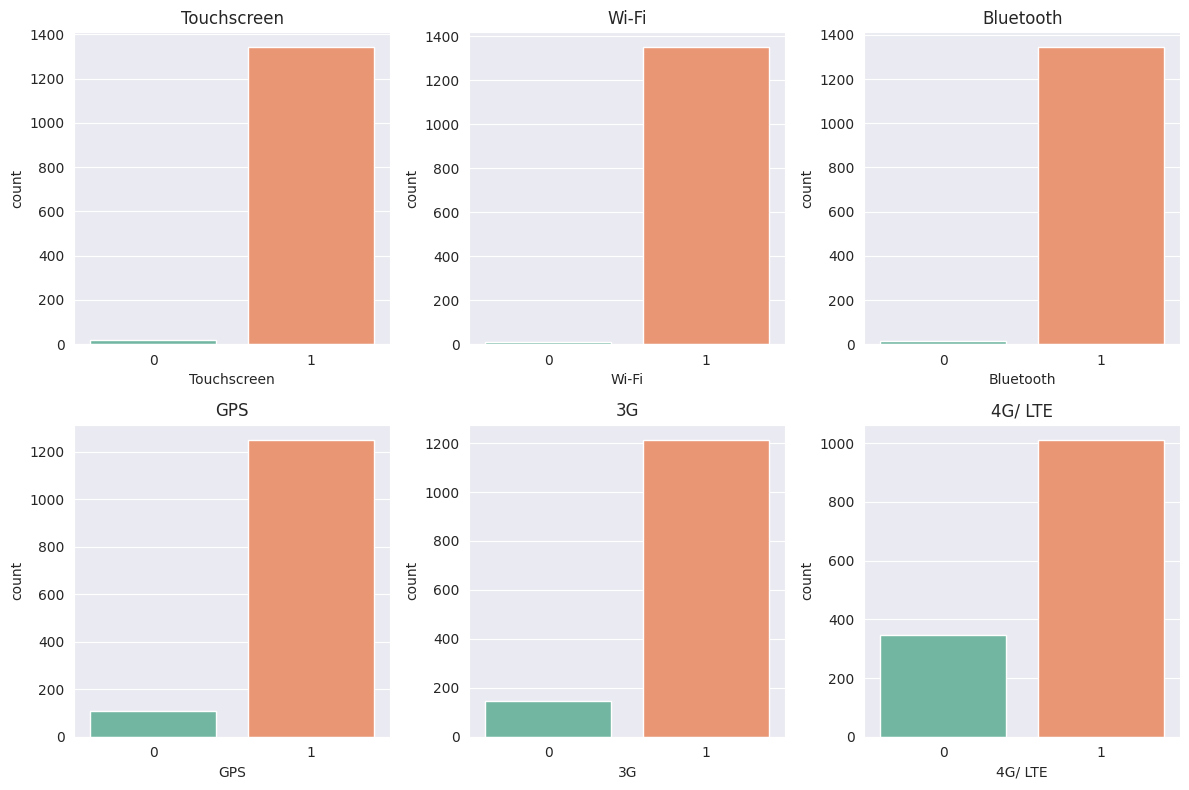

In [ ]:
def bar_bool(df, columns):
    num_rows = len(columns) // 3 + (len(columns) % 3 > 0)  # Calculate the number of rows for subplot grid
    fig, axes = plt.subplots(num_rows, 3, figsize=(12, 8))

    for i, column in enumerate(columns):
        row = i // 3
        col = i % 3
        sns.countplot(data=df, x=column, ax=axes[row, col])
        axes[row, col].set_title(column)

    plt.tight_layout()
    plt.show()

bar_bool(df, col_list)

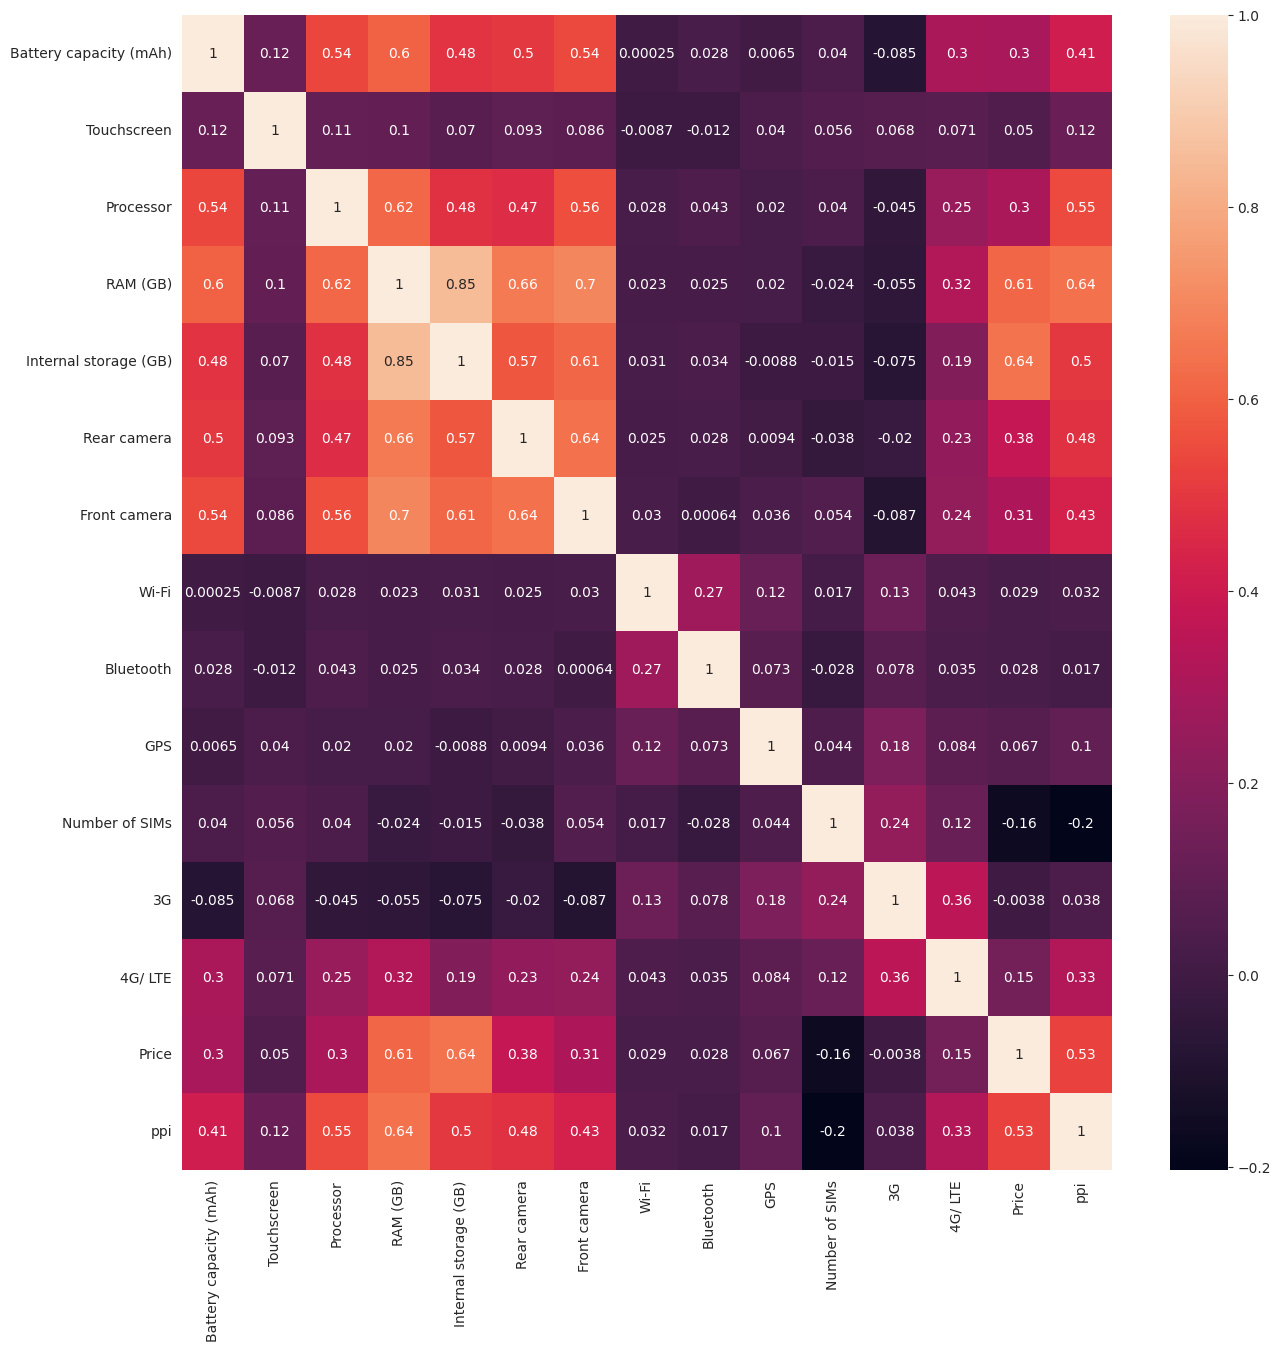

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True,ax=ax)
plt.show()

Regarding Price RAM (GB), internal storage and ppi are highly correlated we can never remove those values. There is 3G and number of sims which is negatively correlated which can also be useful in price prediction.
Touchscreen, Wi-Fi, Bluetooth have very small positive correlation with price which shows they do not really help in prediction. We can apply other feature selection method and find out the importance of all these features

In [ ]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
df.head()

,Brand,Model,Battery capacity (mAh),Touchscreen,Processor,RAM (GB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,ppi
0,OnePlus,7T Pro McLaren Edition,4085,1,8,12.0,256.0,48.0,16.0,Android,1,1,1,2,1,1,58998,515.183966
1,Realme,X2 Pro,4000,1,8,6.0,64.0,64.0,16.0,Android,1,1,1,2,1,1,27999,404.893148
2,Apple,iPhone 11 Pro Max,3969,1,6,4.0,64.0,12.0,12.0,iOS,1,1,1,2,1,1,106900,455.548515
3,Apple,iPhone 11,3110,1,6,4.0,64.0,12.0,12.0,iOS,1,1,1,2,1,1,62900,323.613699
4,LG,G8X ThinQ,4000,1,8,6.0,128.0,12.0,32.0,Android,1,1,1,1,0,0,49990,402.688717


In [ ]:
X=df.drop(columns=['Price', 'Brand', 'Model', 'Operating system'])
y=df['Price']
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

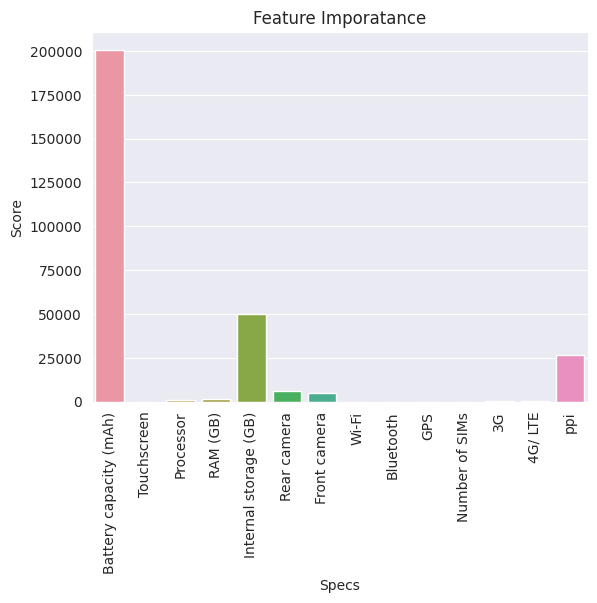

In [ ]:
sns.barplot(x = featureScores['Specs'], y = featureScores['Score'])
plt.xticks(rotation=90)
plt.title('Feature Imporatance')
plt.show()

 As Seen from the above values we can see that almost all the phones have Touchscreen, Wifi and Bluetooth as the count of 0 is very low and we can also see there correlation with Price in the heatmap they have very less positive correlation and as for the above feature selection method by using selectK best features and chisquared value we can see the score for the above three are very less compared to other features so considering these factores we can remove those columns from our dataset as they wont affect our prediction at all.

We remove the Model column as well because a phones name will not affect it's price rather than the brand and the features the smartphone has. You can basically name a smartphone anything. It is not of much relevance.

In [ ]:
df.drop(columns = ['Touchscreen', 'Wi-Fi', 'Bluetooth', 'Model'], inplace = True)
df.head()

,Brand,Battery capacity (mAh),Processor,RAM (GB),Internal storage (GB),Rear camera,Front camera,Operating system,GPS,Number of SIMs,3G,4G/ LTE,Price,ppi
0,OnePlus,4085,8,12.0,256.0,48.0,16.0,Android,1,2,1,1,58998,515.183966
1,Realme,4000,8,6.0,64.0,64.0,16.0,Android,1,2,1,1,27999,404.893148
2,Apple,3969,6,4.0,64.0,12.0,12.0,iOS,1,2,1,1,106900,455.548515
3,Apple,3110,6,4.0,64.0,12.0,12.0,iOS,1,2,1,1,62900,323.613699
4,LG,4000,8,6.0,128.0,12.0,32.0,Android,1,1,0,0,49990,402.688717


Checking for multicollinearity using the VIF factor for each feature. VOne way is to calculate the variance inflation factor for each feature. The VIF is given by 1/(1-R2), where R2 is the coefficient of determination. It is generally deemed that a feature that has a VIF value greater than 5 is highly collinear with other features in the data.

In [ ]:
num_cols=df.select_dtypes(include=['float64','int64']).columns
cat_cols=df.select_dtypes(include=['object']).columns

In [ ]:
data_num=df[num_cols]
lr = LinearRegression()
vif = {}
for col in num_cols:
    other_cols=list(num_cols)
    other_cols.remove(col)
    X=data_num[other_cols]
    y=data_num[col]
    lr.fit(X, y)
    y_pred = lr.predict(X)
    score=r2_score(y, y_pred)
    vif[col] = 1 / (1-score)
vif

{'Battery capacity (mAh)': 1.8065243605270283,
 'Processor': 1.9708682912398696,
 'RAM (GB)': 6.496270960464713,
 'Internal storage (GB)': 4.257953187445702,
 'Rear camera': 2.0623642284855603,
 'Front camera': 2.467994440941899,
 'GPS': 1.0547155832065784,
 'Number of SIMs': 1.2106904383703976,
 '3G': 1.3300586712761744,
 '4G/ LTE': 1.4388944709502962,
 'Price': 2.070816060433479,
 'ppi': 2.23226413479632}

Here we can see that only RAM column has Vif greater than 5 but we saw that it is highly collinear to price and has high feature importance and it is not very much grater than 5 so we will not remove that feature

In [ ]:
#Now lets analyze other categorical columns

In [ ]:
def cat_hist(df, x=None, width=8, height=6, rotation=0, limit=None, title=None):
    plt.figure(figsize=(width,height))
    sns.countplot(x=x, data=df, order = df[x].value_counts().index[:limit])
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.show()

In [ ]:
# Removing the single value smart phones.
value_counts = df['Brand'].value_counts()
# Identify rows with value counts less than 1
rows_to_remove = value_counts[value_counts == 1].index
# Remove rows with value counts less than 1
df = df[~df['Brand'].isin(rows_to_remove)]

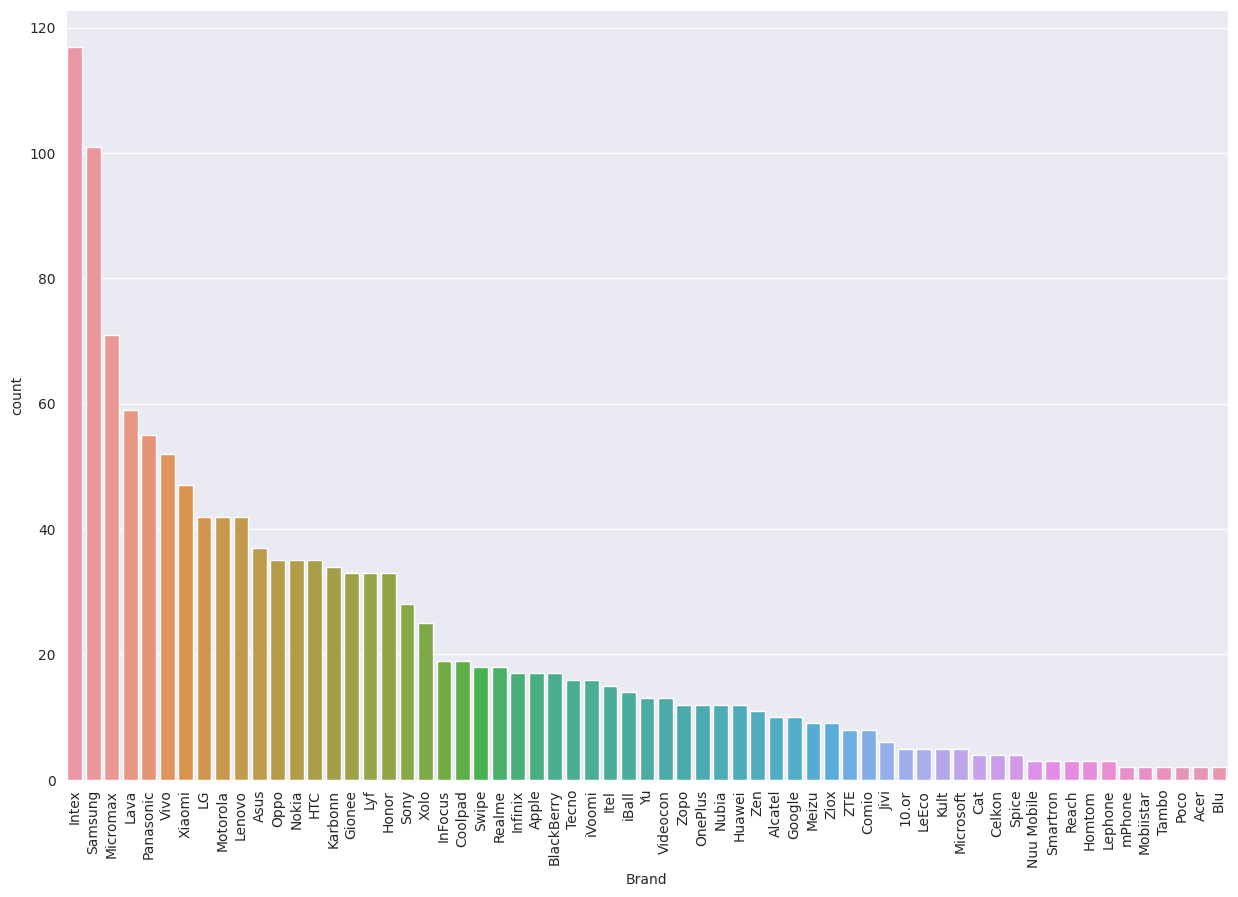

In [ ]:
cat_hist(df,'Brand',width=15,height=10, rotation=90)

Intex, Samsung and Micromax are the brands which have the most number of phones in the dataset

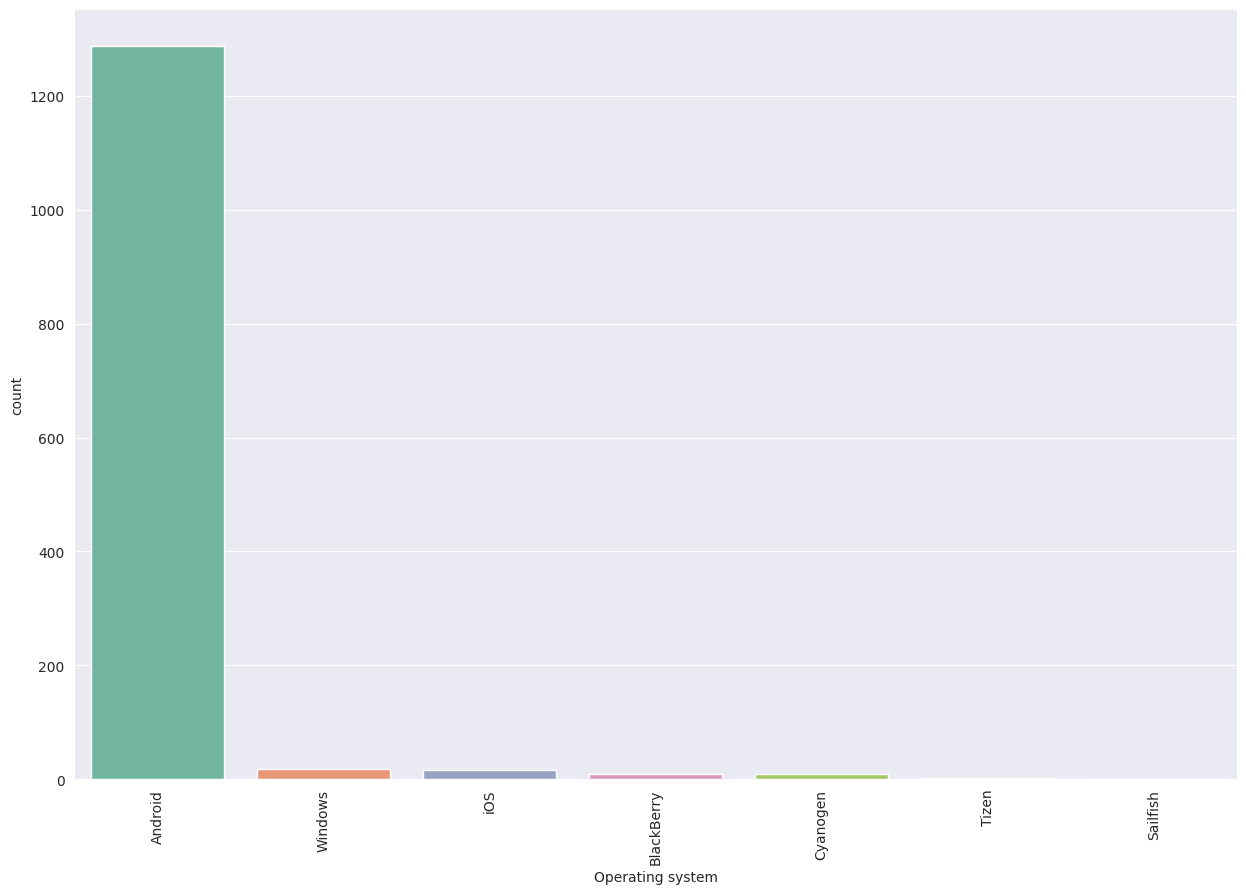

In [ ]:
cat_hist(df,'Operating system',width=15,height=10, rotation=90)

Majority of smartphones have Android Operating System

In [ ]:
def categorical_bar(df, x=None, y=None, width=8, height=6, rotation=0,title=None):
    plt.figure(figsize=(width, height))
    sns.barplot(x=x, y=y, data = df)
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.show()

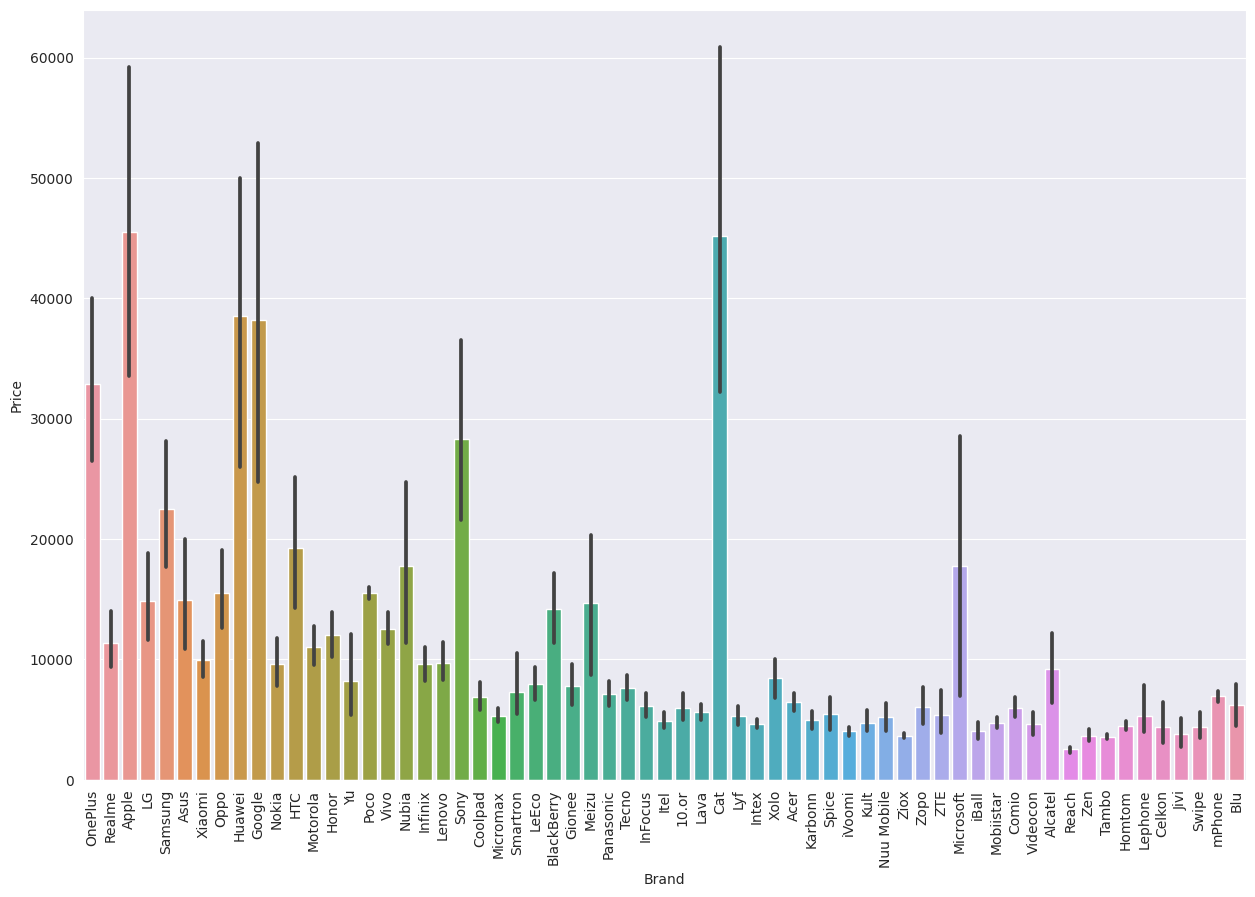

In [ ]:
categorical_bar(df, x='Brand', y='Price',width=15,height=10, rotation=90)

Brands like OnePlus, Apple and Cat have smartphones of high prices

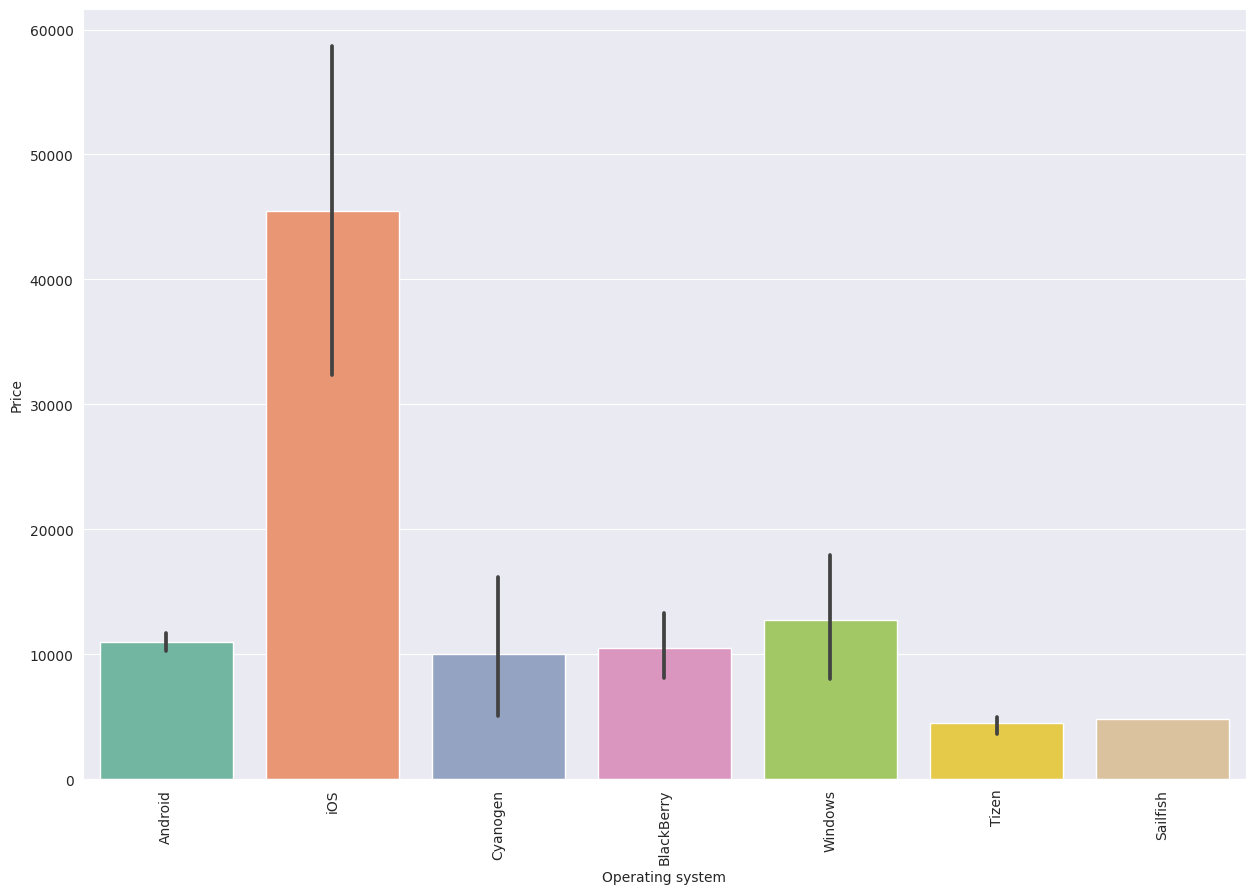

In [ ]:
categorical_bar(df, x='Operating system', y='Price',width=15,height=10, rotation=90)

ios Operating System is the most priced as compared with other Operating Systems

As from the earlier plots for operating sytem we can see that count and price of Tizen and Sailfish is very less so we can combine those 2 operationg system and replace it with value Others so as to increase the count and average pricing on those operating system

In [ ]:
def cat_OS(txt):
    if txt == 'Android' or txt == 'iOS' or txt == 'Windows' or txt == 'BlackBerry':
        return txt
    else:
        return 'Others'

In [ ]:
df['Operating system']=df['Operating system'].apply(cat_OS)

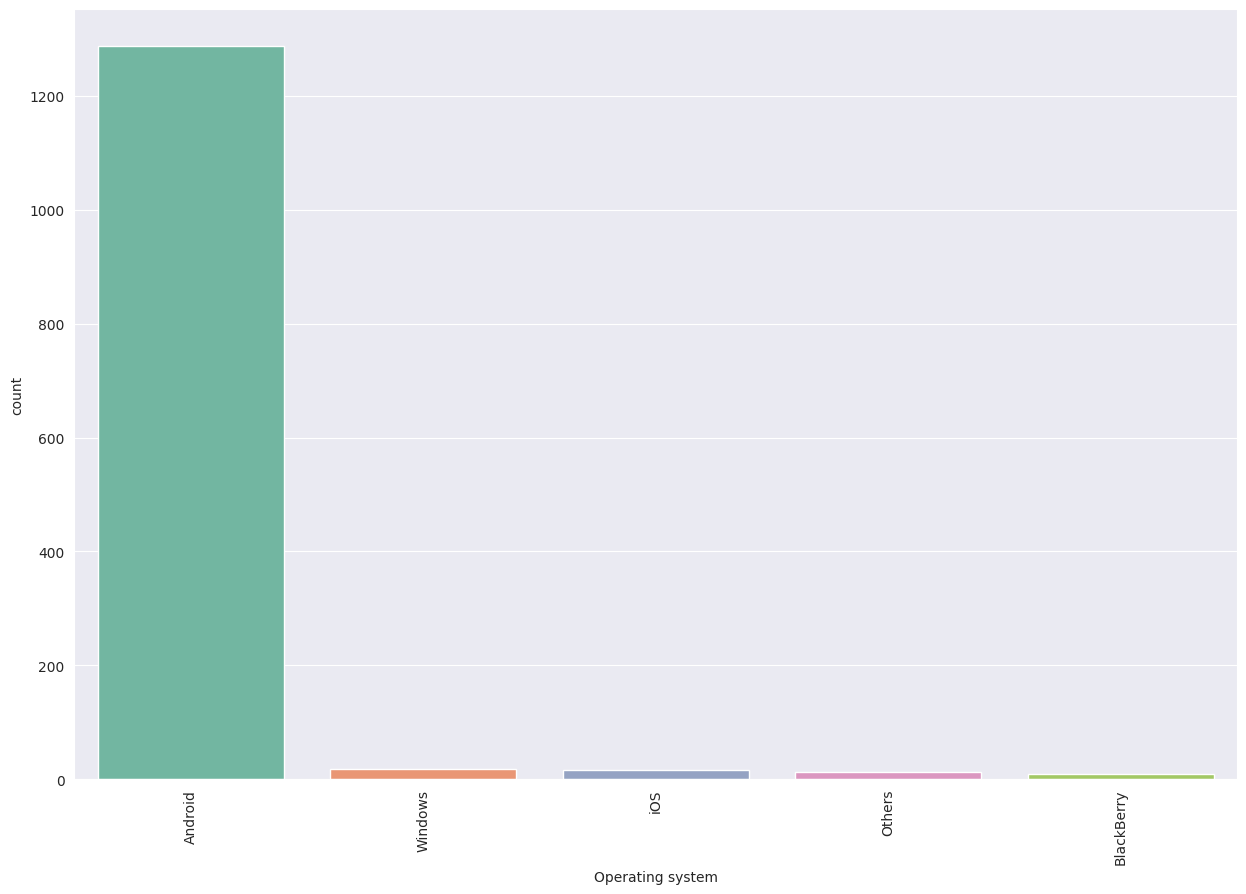

In [ ]:
cat_hist(df,'Operating system',width=15,height=10, rotation=90)

## Modelling and Evaluation

In [ ]:
X=df.drop(columns=['Price'])
y=df['Price']

In [ ]:
# Taking 80% in training and 20 % in testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.head()

,Brand,Battery capacity (mAh),Processor,RAM (GB),Internal storage (GB),Rear camera,Front camera,Operating system,GPS,Number of SIMs,3G,4G/ LTE,ppi
815,Swipe,2500,4,3.0,32.0,13.0,8.0,Android,1,2,1,1,293.720956
1305,iBall,2000,4,2.0,16.0,13.0,8.0,Android,1,2,1,1,293.720956
373,Lenovo,2750,8,2.0,16.0,13.0,5.0,Android,1,2,1,1,440.581434
556,LG,3000,4,1.0,8.0,13.0,1.3,Android,1,2,1,0,200.264288
776,Ziox,2600,4,1.0,8.0,8.0,5.0,Android,1,2,1,1,293.720956


In [ ]:
#Linear Regression - Baseline Model without log transformation of prices
step1 = ColumnTransformer(transformers=[
    ('num_tnf', RobustScaler(),[1,2,3,4,5,6,8,9,10,11,12]),
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,7])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)


y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss =  mean_squared_error(y_test, y_pred)

print('MSE Train Loss', train_loss)
print('RMSE Test Loss ', test_loss**0.5)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

MSE Train Loss 66870017.30473149
RMSE Test Loss  6881.610475078931
R2 score 0.4870955019709553
MAE 4514.521018430174


Linear Regression:


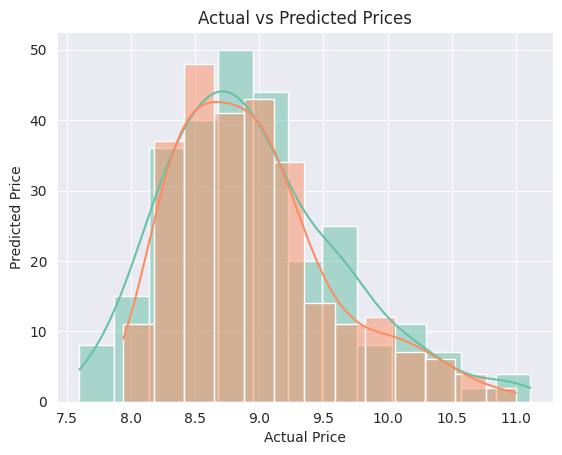

MSE Train Loss: 0.14310174885216165
MSE Test Loss: 0.14105584672191115
R2 Score: 0.700880657207523
MAE: 0.286825874789206

Random Forest:


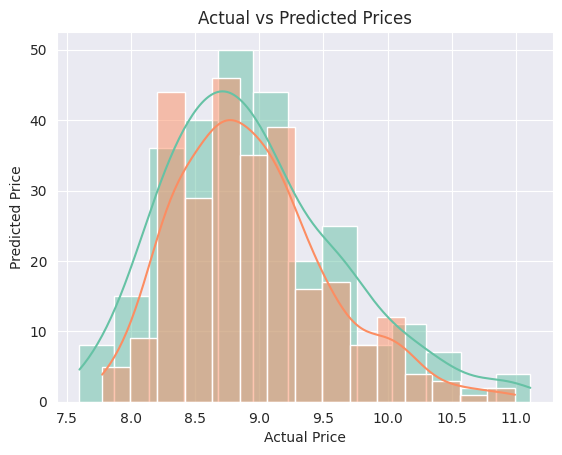

MSE Train Loss: 0.07209859007852186
MSE Test Loss: 0.14995875745764542
R2 Score: 0.6820013773329139
MAE: 0.29273936992276

 SVR:


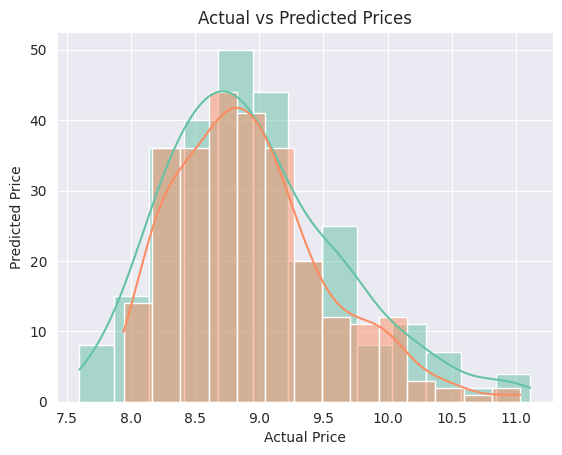

MSE Train Loss: 0.11872114364721462
MSE Test Loss: 0.12352364177311509
R2 Score: 0.7380589929083166
MAE: 0.26955205704665025

Gradient Boosting:


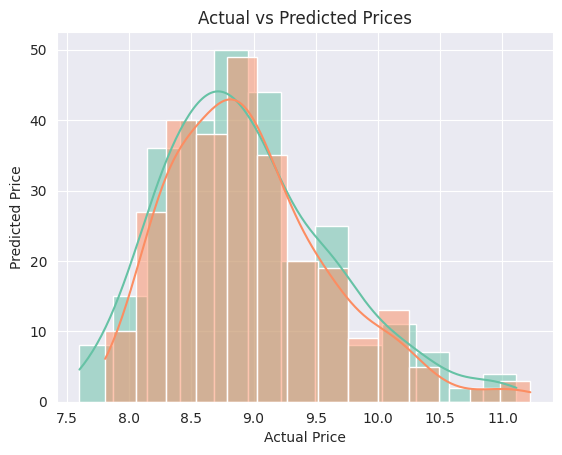

MSE Train Loss: 0.04948412341773153
MSE Test Loss: 0.12268303706301922
R2 Score: 0.7398415572916834
MAE: 0.2629276169602272


In [ ]:
class PricePrediction:
    def __init__(self, data):
        self.data = data
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.results_df = None
        self.num_cols = None
        self.cat_cols  = None

    def preprocess_data(self):
        X = self.data.drop(columns=['Price'])
        y_log = np.log(self.data['Price'])
        X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.num_cols = X_train.select_dtypes(include=['float64','int64']).columns
        self.cat_cols = X_train.select_dtypes(include=['object']).columns

    def linear_regression(self):
        step1 = ColumnTransformer(transformers=[
            ('num_tnf', RobustScaler(), self.num_cols),
            ('col_tnf', OneHotEncoder(sparse=False, drop='first'), self.cat_cols)
        ], remainder='passthrough')

        step2 = LinearRegression()

        pipe = Pipeline([
            ('step1', step1),
            ('step2', step2)
        ])

        pipe.fit(self.X_train, self.y_train)

        y_pred = pipe.predict(self.X_test)
        y_train_pred = pipe.predict(self.X_train)

        self.results_df = pd.DataFrame({'Actual': self.y_test, 'Predicted': y_pred})

        return y_pred, y_train_pred

    def random_forest(self):
        step1 = ColumnTransformer(transformers=[
            ('num_tnf', RobustScaler(), self.num_cols),
            ('col_tnf', OneHotEncoder(sparse=False, drop='first'), self.cat_cols)
        ], remainder='passthrough')

        step2 = RandomForestRegressor(n_estimators=500,
                                       random_state=3,
                                       max_samples=0.5,
                                       max_features=0.75,
                                       max_depth=15)

        pipe = Pipeline([
            ('step1', step1),
            ('step2', step2)
        ])

        pipe.fit(self.X_train, self.y_train)

        y_pred = pipe.predict(self.X_test)
        y_train_pred = pipe.predict(self.X_train)

        self.results_df = pd.DataFrame({'Actual': self.y_test, 'Predicted': y_pred})

        return y_pred, y_train_pred

    def svr(self):
        step1 = ColumnTransformer(transformers=[
            ('num_tnf', RobustScaler(), self.num_cols),
            ('col_tnf', OneHotEncoder(sparse=False, drop='first'), self.cat_cols)
        ], remainder='passthrough')

        step2 = SVR(kernel='rbf',C=1.0, epsilon=0.2)

        pipe = Pipeline([
            ('step1', step1),
            ('step2', step2)
        ])

        pipe.fit(self.X_train, self.y_train)

        y_pred = pipe.predict(self.X_test)
        y_train_pred = pipe.predict(self.X_train)

        self.results_df = pd.DataFrame({'Actual': self.y_test, 'Predicted': y_pred})

        return y_pred, y_train_pred

    def gradient_boosting(self):
        step1 = ColumnTransformer(transformers=[
            ('num_tnf', RobustScaler(), self.num_cols),
            ('col_tnf', OneHotEncoder(sparse=False, drop='first'), self.cat_cols)
        ], remainder='passthrough')

        step2 = GradientBoostingRegressor(n_estimators=500)

        pipe = Pipeline([
            ('step1', step1),
            ('step2', step2)
        ])

        pipe.fit(self.X_train, self.y_train)

        y_pred = pipe.predict(self.X_test)
        y_train_pred = pipe.predict(self.X_train)

        self.results_df = pd.DataFrame({'Actual': self.y_test, 'Predicted': y_pred})

        return y_pred, y_train_pred


    def visualize(self):
        sns.histplot(data=self.results_df, x='Actual', label='Actual', kde=True)
        sns.histplot(data=self.results_df, x='Predicted', label='Predicted', kde=True)
        plt.xlabel('Actual Price')
        plt.ylabel('Predicted Price')
        plt.title('Actual vs Predicted Prices')
        plt.show()

    def calculate_losses(self, y_pred, y_train_pred):
        train_loss = mean_squared_error(self.y_train, y_train_pred)
        test_loss = mean_squared_error(self.y_test, y_pred)

        print('MSE Train Loss:', train_loss)
        print('MSE Test Loss:', test_loss)
        print('R2 Score:', r2_score(self.y_test, y_pred))
        print('MAE:', mean_absolute_error(self.y_test, y_pred))

    def main(self):
        self.preprocess_data()

        # Linear Regression
        print("Linear Regression:")
        y_pred_lr, y_train_pred_lr = self.linear_regression()
        self.visualize()
        self.calculate_losses(y_pred_lr, y_train_pred_lr)

        # Random Forest
        print("\nRandom Forest:")
        y_pred_rf, y_train_pred_rf = self.random_forest()
        self.visualize()
        self.calculate_losses(y_pred_rf, y_train_pred_rf)

        #SVR
        print("\n SVR:")
        y_pred_rf, y_train_pred_rf = self.svr()
        self.visualize()
        self.calculate_losses(y_pred_rf, y_train_pred_rf)

        # Gradient Boosting
        print("\nGradient Boosting:")
        y_pred_gb, y_train_pred_gb = self.gradient_boosting()
        self.visualize()
        self.calculate_losses(y_pred_gb, y_train_pred_gb)


# Create an instance of the PricePrediction class
price_prediction = PricePrediction(df)

# Run the main method
price_prediction.main()


As we can see that gradient boosting performs the best with an R2 score of 0.739 and MSE of 0.12 on the test set which is very good compared to other models.
The histplot of gradient boost shows that the distribution of actual and predicted price is very similar in the range of 7.5 - 9.5 (log values of price)which means majority of the predicted price is calculated very close to the actual price hence less MSE loss as compared to other models and on the train data MSE loss is 0.04 which shows that the model is fitting well.